<a href="https://colab.research.google.com/github/timothyalcaide/darknet/blob/master/yolo_darknet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[YOLO notes](https://colab.research.google.com/drive/1_GdoqCJWXsChrOiY8sZMr_zbr_fH-0Fg#scrollTo=bBFiu7rFZdmU
)

# Mount Drive

[source tuto](https://towardsdatascience.com/google-drive-google-colab-github-dont-just-read-do-it-5554d5824228)

In [ ]:
# Mount Google Drive
%cd ..
from google.colab import drive
drive.mount('/content/drive')        

In [64]:
%pwd
%cd /content/drive/My Drive/IA
%ls

/content/drive/My Drive/IA
darknet/  images/  videos/  yolo-codelab/  yolov4/


In [77]:
# this creates a symbolic link so 
!ln -s /content/drive/My\ Drive/IA/ /mydrive
!ls /mydrive

ln: failed to create symbolic link '/mydrive/IA': Operation not supported
darknet  images  videos  yolo-codelab  yolov4


# Clone github repo

In [50]:
# Clone github repository setup
from os.path import join  

ROOT = "/content/drive" 
MY_GOOGLE_DRIVE_PATH = 'My Drive/IA/' 
GIT_USERNAME = "timothyalcaide" 
GIT_TOKEN = "7802dd553c96b9dfa6becd8141de1a14340e6629"  
GIT_REPOSITORY = "darknet" 

IA_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)
PROJECT_PATH = join(IA_PATH, GIT_REPOSITORY)

# It's good to print out the value if you are not sure 
print("IA_PATH: ", IA_PATH)   
print("PROJECT_PATH: ", PROJECT_PATH)   

GIT_PATH = "https://" + GIT_TOKEN + "@github.com/" + GIT_USERNAME + "/" + GIT_REPOSITORY + ".git"
print("GIT_PATH: ", GIT_PATH)

IA_PATH:  /content/drive/My Drive/IA/
PROJECT_PATH:  /content/drive/My Drive/IA/darknet
GIT_PATH:  https://7802dd553c96b9dfa6becd8141de1a14340e6629@github.com/timothyalcaide/darknet.git


In [ ]:
%cd "{IA_PATH}" 
%rm -rf darknet
!git clone "{GIT_PATH}"

In [ ]:
!git config --global user.email "timothy.alcaide@gmail.com"
!git config --global user.name "Timothy Alcaide"

# YOLO Initialisation

In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd "{PROJECT_PATH}" 
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/drive/My Drive/IA/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

# Test YOLO with pre-trained model

In [ ]:
# Download pre-trained YOLOv4 weights
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

In [96]:
%cd /mydrive/darknet  #or "{PROJECT_PATH}" 
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/person.jpg

[Errno 2] No such file or directory: '/mydrive/darknet #or /content/drive/My Drive/IA/darknet'
/content/drive/My Drive/IA/darknet
 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7

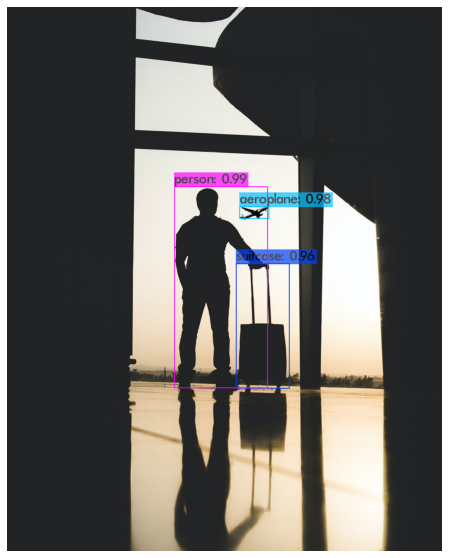

In [106]:
# show image using our helper function
imShow('predictions.jpg')

In [ ]:
%cd /mydrive/darknet
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights -ext_output -out /mydrive/images/result.json < /mydrive/images/images.txt

In [104]:
download('/mydrive/images/result.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>